In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd /gdrive/My Drive/polimi/artificialneuraldeep

/gdrive/My Drive/polimi/artificialneuraldeep


In [34]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.6.0


In [14]:
seed=42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)


In [2]:
from sklearn.datasets import load_boston


In [3]:
data=load_boston()


In [4]:
data

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [5]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
boston_dataset=pd.DataFrame(data.data,columns=data.feature_names)
target=pd.DataFrame(data.target,columns=['MEDV'])
print("Boston dataset shape:" , boston_dataset)


Boston dataset shape:         CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x 13 co

In [7]:
boston_dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(boston_dataset, target, test_size = 0.2, random_state=seed)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 13) (404, 1)
(102, 13) (102, 1)


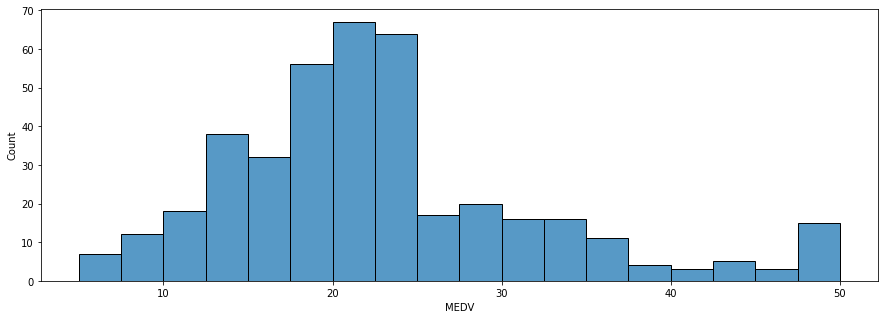

In [16]:
# Inspect the target
#mpl.rcParams.update(mpl.rcParamsDefault)
#sns.set(font_scale=1.1, style=None, palette='Set2')
plt.figure(figsize=(15,5))
sns.histplot(data=y_train, x='MEDV')
plt.show()

In [17]:
# Normalize both features and target
max_df = X_train.max()
min_df = X_train.min()
max_t = y_train.max()
min_t = y_train.min()

X_train = (X_train - min_df)/(max_df - min_df)
y_train = (y_train - min_t)/(max_t - min_t)

print('Boston dataset shape',X_train.shape)
print('Target shape', y_train.shape)
X_train.describe()

Boston dataset shape (404, 13)
Target shape (404, 1)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.040465,0.115693,0.379446,0.071782,0.352848,0.498859,0.676173,0.243577,0.363323,0.414184,0.608332,0.897570,0.296009
std,0.099757,0.231525,0.255356,0.258447,0.242190,0.144285,0.288310,0.193802,0.373466,0.317123,0.237096,0.230890,0.196203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000814,0.000000,0.162593,0.000000,0.137860,0.412345,0.439238,0.087140,0.130435,0.175573,0.446809,0.945969,0.139142
50%,0.002836,0.000000,0.289630,0.000000,0.314815,0.477324,0.770340,0.186066,0.173913,0.272901,0.648936,0.985892,0.253725
75%,0.035900,0.200000,0.642963,0.000000,0.506173,0.564114,0.934604,0.388400,0.478261,0.914122,0.808511,0.997113,0.404042
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


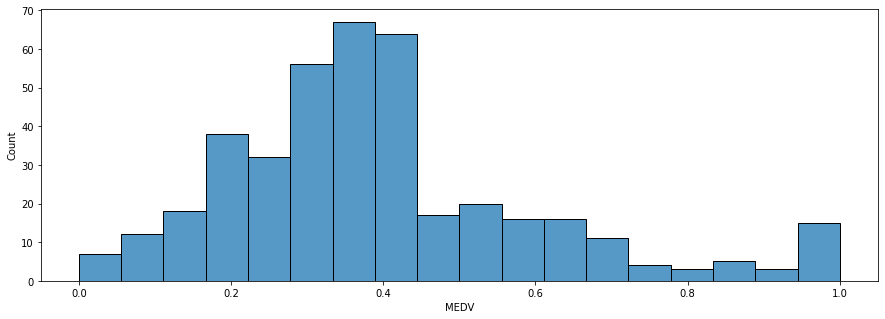

In [20]:
# Inspect the target after normalization
#mpl.rcParams.update(mpl.rcParamsDefault)
#sns.set(font_scale=1.1, style=None, palette='Set2')
plt.figure(figsize=(15,5))
sns.histplot(data=y_train, x='MEDV')
plt.show()

In [21]:
input_shape = X_train.shape[1:]
loss = tfk.losses.MeanSquaredError()
learning_rate = 0.2
optimizer = tfk.optimizers.SGD(learning_rate)

In [23]:
def build_ffnn(input_shape, loss, opt):

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')
    hidden_layer1 = tfkl.Dense(units=64, activation='relu', name='Hidden1')(input_layer)
    hidden_layer2 = tfkl.Dense(units=64, activation='relu', name='Hidden2')(hidden_layer1)
    output_layer = tfkl.Dense(units=1, activation='linear', name='Output')(hidden_layer2)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='FFNN')

    # Compile the model
    model.compile(loss=loss, optimizer=opt)

    # Return the model
    return model

Model: "FFNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 13)]              0         
_________________________________________________________________
Hidden1 (Dense)              (None, 64)                896       
_________________________________________________________________
Hidden2 (Dense)              (None, 64)                4160      
_________________________________________________________________
Output (Dense)               (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


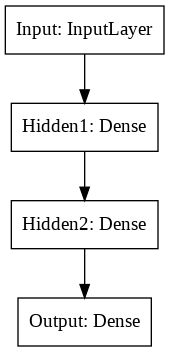

In [24]:
ffnn = build_ffnn(input_shape, loss, optimizer)
ffnn.summary()
tfk.utils.plot_model(ffnn)

In [25]:
batch_size = 128
epochs = 5000

In [26]:
history = ffnn.fit(
    x = X_train,
    y = y_train, 
    batch_size = batch_size,
    epochs = epochs
).history

Se han truncado las últimas 5000 líneas del flujo de salida.
4/4 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 2502/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 2503/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 2504/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 2505/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 2506/5000
4/4 [==============================] - 0s 10ms/step - loss: 0.0016
Epoch 2507/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 2508/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 2509/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 2510/5000
4/4 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 2511/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 2512/5000
4/4 [==============================]

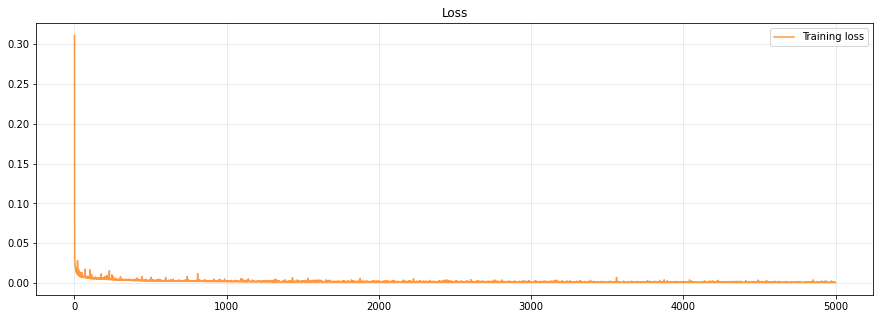

In [33]:
#mpl.rcParams.update(mpl.rcParamsDefault)
plt.figure(figsize=(15,5))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [30]:
def plot_residuals(model, X_, y_):
    X_['sort'] = y_
    X_ = X_.sort_values(by=['sort'])
    y_ = np.expand_dims(X_['sort'], 1)
    X_.drop(['sort'], axis=1, inplace=True)

    y_pred = model.predict(X_)
    SSE = np.square(y_pred - y_)
    MSE = np.mean(SSE)

    print('Mean Squared Error (MSE):', MSE)

    mpl.rcParams.update(mpl.rcParamsDefault)
    sns.set(font_scale=1.1, style=None, palette='Set1')
    plt.figure(figsize=(15,5))
    plt.scatter(np.arange(len(y_)), y_, label='True')
    plt.scatter(np.arange(len(y_pred)), y_pred, label='Prediction')
    
    for i in range(len(y_)):
        if(y_[i]>=y_pred[i]):
            plt.vlines(i,y_pred[i],y_[i],alpha=.5)
        else:
            plt.vlines(i,y_[i],y_pred[i],alpha=.5)
            
    plt.legend()
    plt.grid(alpha=.3)
    plt.show()

Mean Squared Error (MSE): 0.0009457487877375815


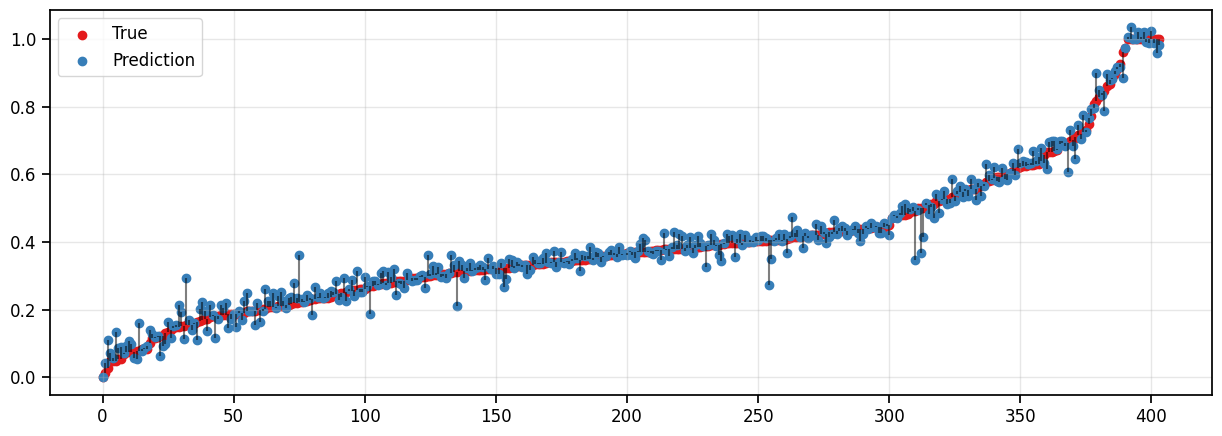

In [35]:
plot_residuals(ffnn, X_train.copy(), y_train.copy())

Mean Squared Error (MSE): 0.004201513588849712


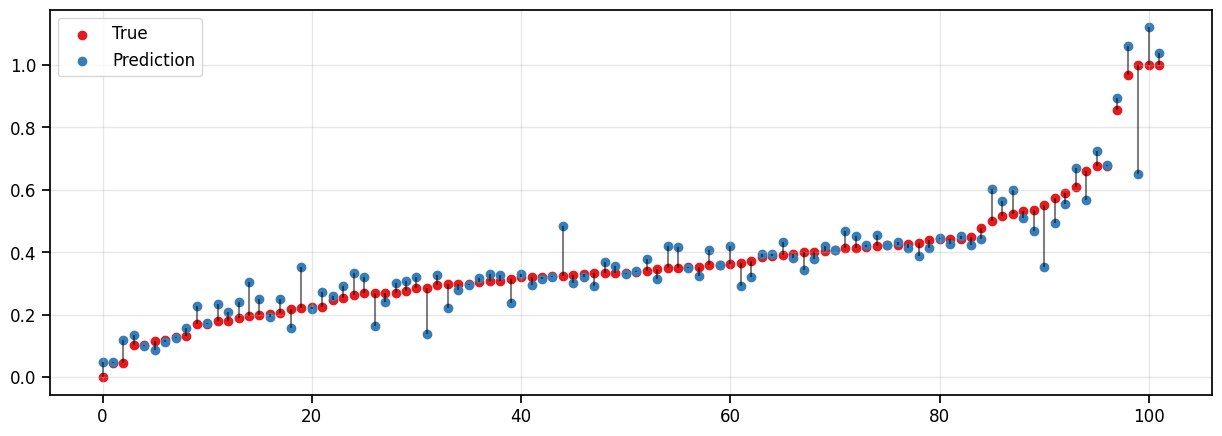

In [36]:
plot_residuals(ffnn, X_test.copy(), y_test.copy())

In [37]:
ffnn.save('MyFirstFFNN')

INFO:tensorflow:Assets written to: MyFirstFFNN/assets


INFO:tensorflow:Assets written to: MyFirstFFNN/assets
